In [1]:
library(monocle3)
library(dplyr) # imported for some downstream data manipulation

expression_matrix <- readRDS(url("https://depts.washington.edu:/trapnell-lab/software/monocle3/celegans/data/cao_l2_expression.rds"))
cell_metadata <- readRDS(url("https://depts.washington.edu:/trapnell-lab/software/monocle3/celegans/data/cao_l2_colData.rds"))
gene_annotation <- readRDS(url("https://depts.washington.edu:/trapnell-lab/software/monocle3/celegans/data/cao_l2_rowData.rds"))

cds <- new_cell_data_set(expression_matrix,
                         cell_metadata = cell_metadata,
                         gene_metadata = gene_annotation)

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading

In [24]:
head(expression_matrix)

  [[ suppressing 34 column names ‘cele-001-001.CATGACTCAA’, ‘cele-001-001.AAGACGGCCA’, ‘cele-001-001.GCCAACGCCA’ ... ]]



6 x 42035 sparse Matrix of class "dgCMatrix"
                                                                              
WBGene00000001 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
WBGene00000002 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
WBGene00000003 . . . . . . . . . . . . . . . . . . . . . . . . . . . . 2 . . .
WBGene00000004 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
WBGene00000005 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
WBGene00000006 . . . . . . 1 . . . . . . . . . . . . . . . . . 2 . . . . . . .
                         
WBGene00000001 . . ......
WBGene00000002 . . ......
WBGene00000003 . . ......
WBGene00000004 . . ......
WBGene00000005 . . ......
WBGene00000006 . . ......

 .....suppressing 42001 columns in show(); maybe adjust options(max.print=, width=)
 ..............................

In [14]:
head(cell_metadata)

,plate,cao_cluster,cao_cell_type,cao_tissue
,<fct>,<fct>,<chr>,<chr>
cele-001-001.CATGACTCAA,001,20,Unclassified neurons,Neurons
cele-001-001.AAGACGGCCA,001,6,Germline,Gonad
cele-001-001.GCCAACGCCA,001,13,Intestinal/rectal muscle,Intestinal/rectal muscle
cele-001-001.ATAGGAGTAC,001,27,Vulval precursors,NA
cele-001-001.CTCGTCTAGG,001,2,Coelomocytes,Coelomocytes
cele-001-001.AAGTTGCCAT,001,6,Germline,Gonad


In [15]:
head(gene_annotation)

,gene_short_name
,<fct>
WBGene00000001,aap-1
WBGene00000002,aat-1
WBGene00000003,aat-2
WBGene00000004,aat-3
WBGene00000005,aat-4
WBGene00000006,aat-5


In [2]:
cds <- preprocess_cds(cds, num_dim = 100)

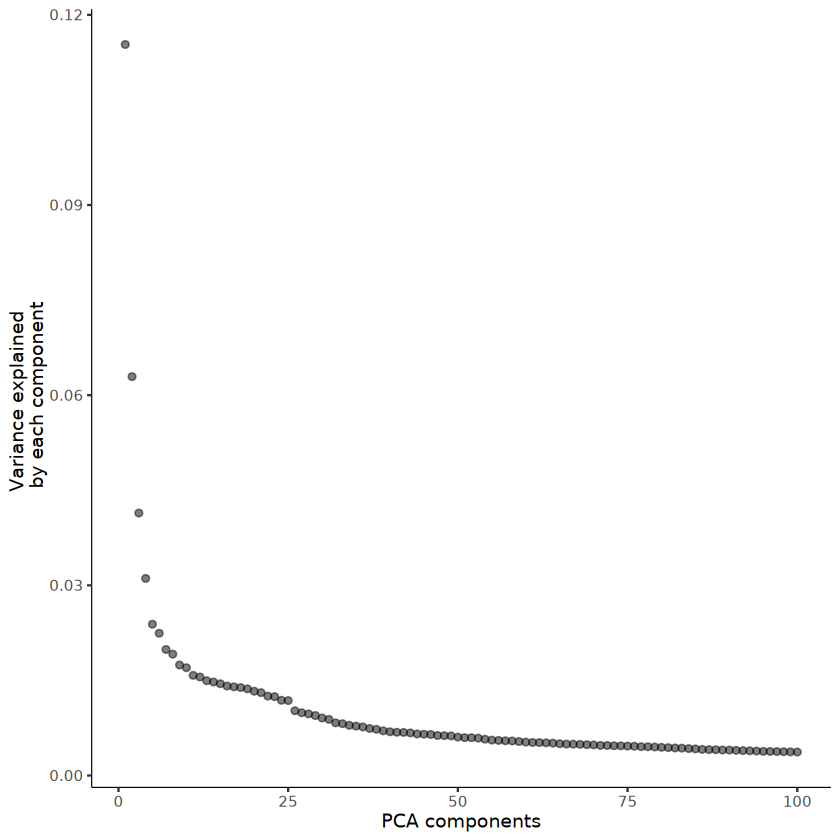

In [3]:
plot_pc_variance_explained(cds)

In [4]:
cds <- reduce_dimension(cds)

No preprocess_method specified, using preprocess_method = 'PCA'



No trajectory to plot. Has learn_graph() been called yet?

cluster not found in colData(cds), cells will not be colored

cluster_cells() has not been called yet, can't color cells by cluster



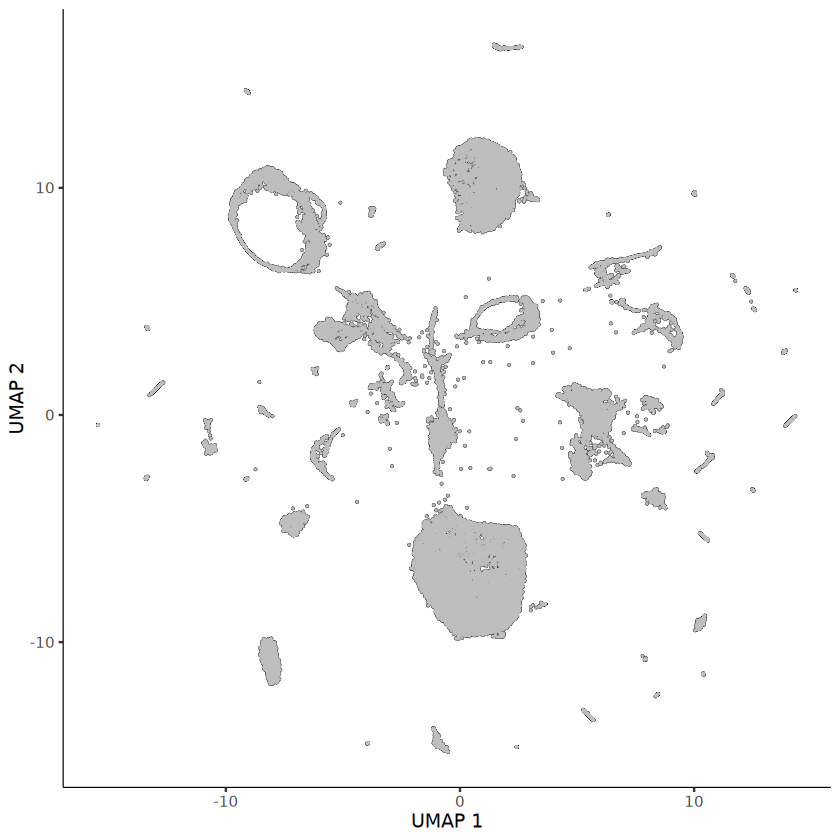

In [5]:
plot_cells(cds)

No trajectory to plot. Has learn_graph() been called yet?

Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_text_repel()`).”


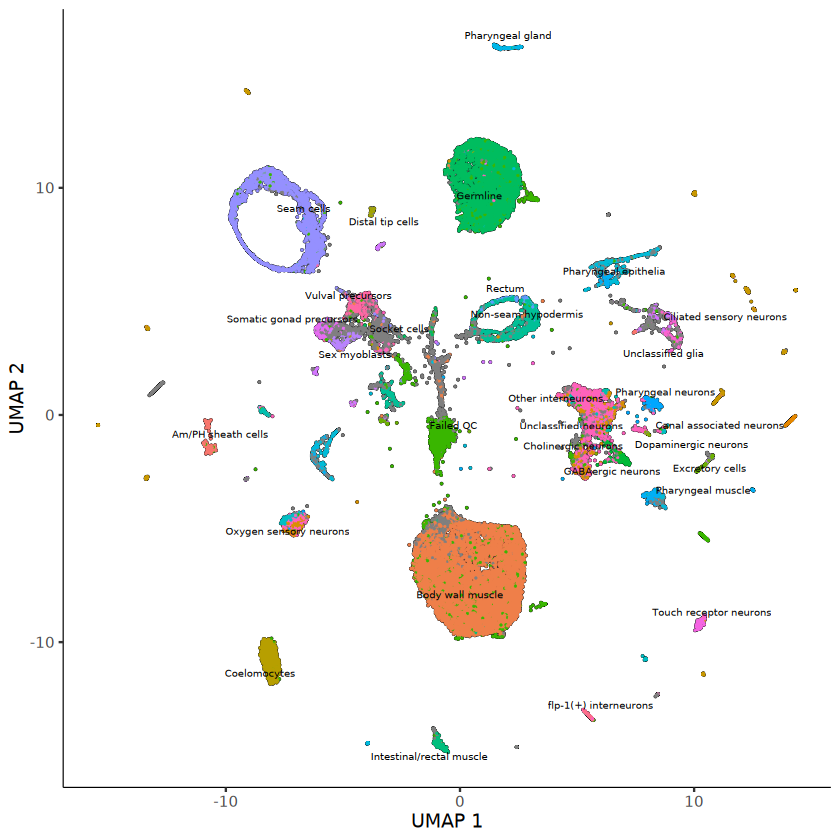

In [6]:
plot_cells(cds, color_cells_by="cao_cell_type")

No trajectory to plot. Has learn_graph() been called yet?



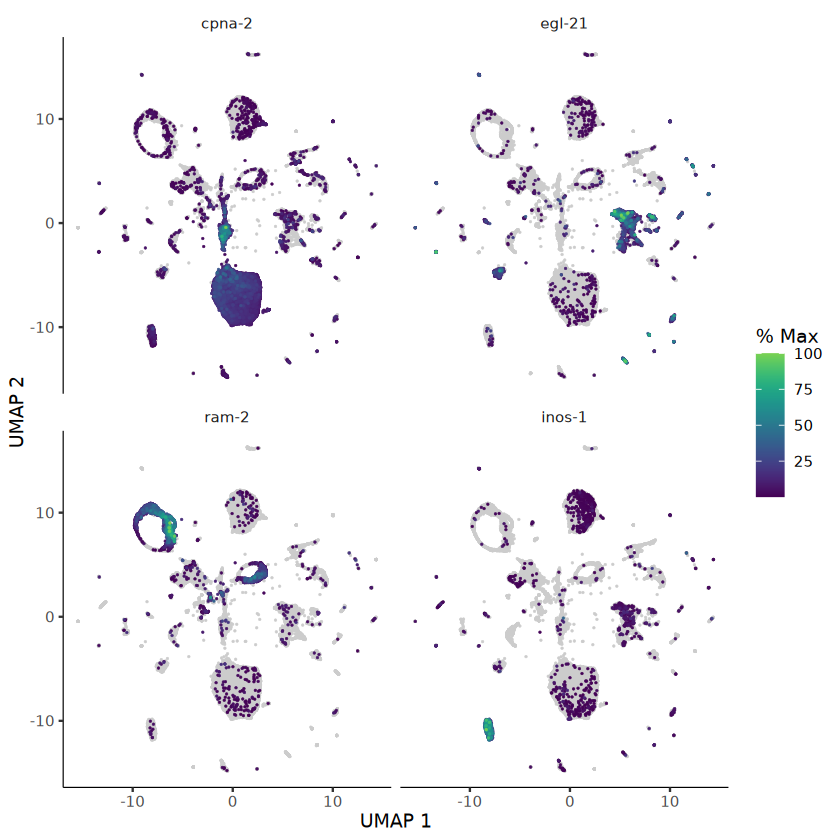

In [7]:
plot_cells(cds, genes=c("cpna-2", "egl-21", "ram-2", "inos-1"))

No trajectory to plot. Has learn_graph() been called yet?



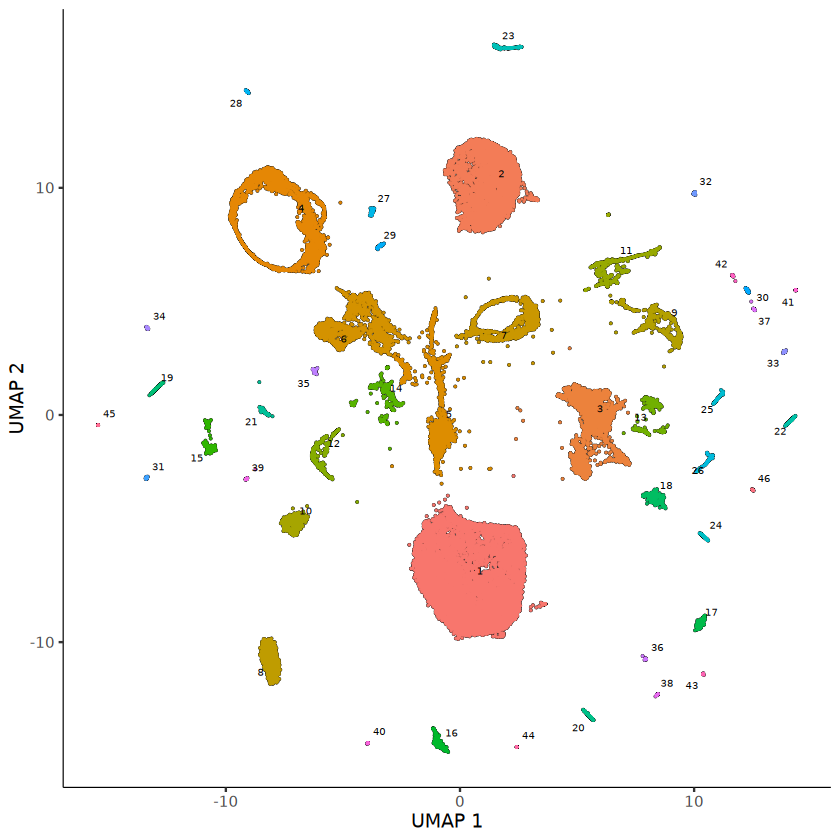

In [8]:
cds <- cluster_cells(cds, resolution=1e-5)
plot_cells(cds)

No trajectory to plot. Has learn_graph() been called yet?



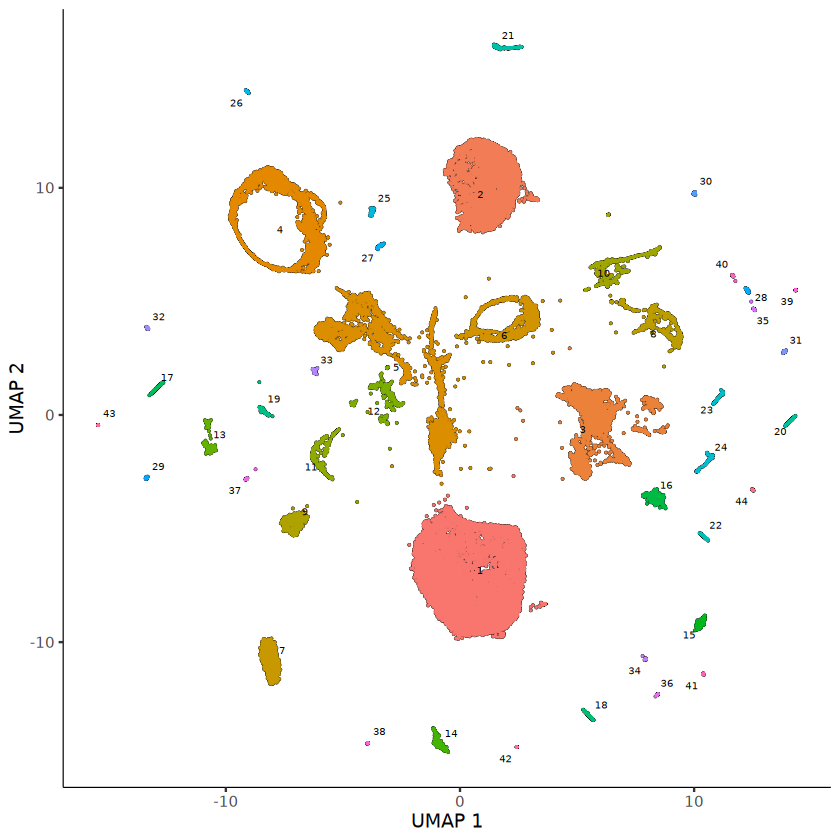

In [9]:
plot_cells(cds, color_cells_by="partition", group_cells_by="partition")

In [17]:
colData(cds)

DataFrame with 42035 rows and 5 columns
                           plate cao_cluster          cao_cell_type
                        <factor>    <factor>            <character>
cele-001-001.CATGACTCAA      001          20   Unclassified neurons
cele-001-001.AAGACGGCCA      001          6                Germline
cele-001-001.GCCAACGCCA      001          13 Intestinal/rectal mu..
cele-001-001.ATAGGAGTAC      001          27      Vulval precursors
cele-001-001.CTCGTCTAGG      001          2            Coelomocytes
...                          ...         ...                    ...
cele-010-092.CGTATTGAGA      010          17                     NA
cele-010-092.AGGTCTATGG      010          27      Vulval precursors
cele-010-092.TGCGAAGATC      010          9        Body wall muscle
cele-010-092.GTATTAAGTT      010          26              Failed QC
cele-010-092.GAAGTCCGTC      010          16      GABAergic neurons
                                    cao_tissue Size_Factor
                 

In [10]:
marker_test_res <- top_markers(cds, group_cells_by="partition", 
                               reference_cells=1000, cores=8)

  |=======================================================| 100%, Elapsed 00:02
  |=======================================================| 100%, Elapsed 00:12


In [11]:
head(marker_test_res)

,gene_id,gene_short_name,cell_group,marker_score,mean_expression,fraction_expressing,specificity,pseudo_R2,marker_test_p_value,marker_test_q_value
,<chr>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,WBGene00000017,abf-6,16,0.1134909,0.8712478,0.2730061,0.4157084,0.1435981,1.805193e-46,1.610095e-40
2,WBGene00000024,abu-1,10,0.1590839,0.9682577,0.1823444,0.8724362,0.1065055,2.292508e-52,2.044743e-46
3,WBGene00000031,abu-8,10,0.4000128,13.8628007,0.5904486,0.6774726,0.3762319,1.992132e-181,1.776831e-175
4,WBGene00000033,abu-10,10,0.1955284,1.1834266,0.3010130,0.6495679,0.1722442,1.083792e-83,9.666601e-78
5,WBGene00000037,ace-3,20,0.2140281,1.2143677,0.3839662,0.5574138,0.2459135,1.143888e-64,1.020261e-58
6,WBGene00000069,acy-2,20,0.3011404,1.4929606,0.4303797,0.6997085,0.3026877,3.139514e-79,2.800208e-73


In [20]:
cell_group_df <- data.frame(row.names=row.names(colData(cds)),
                              cell_id=row.names(colData(cds)))

group_cells_by = "cluster"

# Set up the table that partitions the cells into groups.
  # Must be either a column in colData or one of "cluster" or "partition.
  # FIXME: Should check its not a column you can't really use for grouping
  # (i.e. a floating point value)
  if (group_cells_by == "cluster"){
    cell_group_df$cell_group <- clusters(cds, reduction_method = "UMAP")
  } 
  cell_group_df$cell_group <- as.character(cell_group_df$cell_group)


In [21]:
head(cell_group_df)

,cell_id,cell_group
,<chr>,<chr>
cele-001-001.CATGACTCAA,cele-001-001.CATGACTCAA,21
cele-001-001.AAGACGGCCA,cele-001-001.AAGACGGCCA,2
cele-001-001.GCCAACGCCA,cele-001-001.GCCAACGCCA,16
cele-001-001.ATAGGAGTAC,cele-001-001.ATAGGAGTAC,6
cele-001-001.CTCGTCTAGG,cele-001-001.CTCGTCTAGG,8
cele-001-001.AAGTTGCCAT,cele-001-001.AAGTTGCCAT,2


In [22]:
aggregate_gene_expression(cds,
                       cell_group_df=cell_group_df,
                       norm_method="size_only",
                       scale_agg_values=FALSE)

  [[ suppressing 32 column names ‘1’, ‘10’, ‘11’ ... ]]

  [[ suppressing 32 column names ‘1’, ‘10’, ‘11’ ... ]]

  [[ suppressing 32 column names ‘1’, ‘10’, ‘11’ ... ]]



20271 x 46 sparse Matrix of class "dgCMatrix"
                                                                                            
WBGene00000001 5.101520e-03 0.0165837905 6.551856e-03 0.0127435241 .            0.0117145214
WBGene00000002 5.163183e-04 0.0054064689 1.613617e-01 0.0829789866 0.0337420821 0.0159804162
WBGene00000003 2.695114e-02 0.0324833582 4.239152e-03 .            0.0058129586 0.0039707254
WBGene00000004 3.235473e-02 0.0336371588 3.076639e-03 0.0204747556 0.0484825972 0.0295993806
WBGene00000005 3.059328e-05 .            .            .            .            .           
WBGene00000006 1.286312e-01 0.3034209629 1.648540e-02 0.0045539741 0.0918832634 0.0033008967
WBGene00000007 8.996491e-05 .            .            0.0132380309 .            .           
WBGene00000008 8.806518e-05 0.0015393009 .            .            .            .           
WBGene00000009 6.825788e-05 .            .            .            .            .           
WBGene00000010 1.504974e

In [23]:
dim(assays(cds)$counts)
dim(assays(cds)$logcounts)

[1] 20271 42035

NULL